# Computational ODEs
created by: Wesley Terrill
created on: 2020/11/11

revision notes located on bottom of page.

## Euler Method

A linear differntial equation is of the form: <br/>
$
a_{n}(t)y^{(n)} + a_{n-1}(t)y^{(n-1)}+ ... + a_1(t)y' + a_0(t)y_0 = g(t)
$
<br/>
where $a_n,...,a_0, g$ are functions of the independent variable $t$.
<br/>
The simplest numerical method for approximating solutions of differential equations is Euler's method. 

Consider a first order differential equation with an initial condtion:<br/>
$
y' = f(y,t), y(t_0)=y_0
$

#### Step 1:
Construct the equation of the tangent line to the unknown function $y(t)$ at $t=t_0$.<br/>
$
y=y(t_0)+f(y_0,t_0)(t-t_0)
$
<br/>
where $y'(t_0)=f(y_0,t_0)$ is the slope of the equation at time $t=t_0$.

#### Step 2:
Use the tangent line to approximate the function at a later time $t1=t_0+\delta t$:<br/>
$
y_1 = y_0 + f(y_0,t_0)(t_1-t_0) \\
        =y_0 + f(y_0,t_0)(\delta t)
$

where $y_1 \approx y_1(t)$.

#### Step 3:
Construct tangent line at the point (t_1,y_1) and repeat.

Euler's method produces a recursive relation for finding each next point:
$
y_{n+1}=y_n + f(y_n,t_n)(t_{n+1}-t_n), y_0 = y(t_0)
$

where $y_n \approx y(t_n)$.
<br/>
We can choose the time steps to be equally spaced t values then the recursive formula becomes:<br/>
$
y_{n+1} = y_n + f(y_n,t_n)(\delta t), y_0 = y(t_0), t_n = t_0 + n \delta t
$

where the time step is defined by $\delta t = t_{n+1}-t_n$

NOTES:
* smaller time steps decrease the error size
* smaller time steps increases the number of calculations

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from mpmath import *
from IPython.display import display, Math

from sympy import *
from sympy.physics.vector import dynamicsymbols
from sympy import diff, Symbol
from sympy.abc import t

In [2]:
def ODE_Euler(f, y0, t):
    '''
    Approximate the solution of y'=f(y,t) by Euler's method
    
    Parameters
    ----------
    f: function
        RHS of ODE y'=f(y,t)
    y0: number
        Initial condition of y(0)=y0
    t: array
        Numpy array of t values where we approximate y values. 
        Time step at each iteration is given by t[n+1] - t[n].
    
    Returns
    -------
    y: array
        Approximation y[n] of the solution y(t_n) computed by Euler's method.
        
    '''
    y=[]
    v=1
    y.append(y0)
    for n in range(0, len(t)-1):
        y_next = y[n] + f(y[n],t[n])*(t[n+1] - t[n])
        y.append(y_next)
    
    return y, v

#### Example: 
We can check how well our numerical method works by checking with an example.

Let's implement this procedure for $y' = y$ for $0 \leq t \leq 5$ and $y(0) = 1$.<br/>

First we should solve this using analytical methods to have a base equation to test against.
$
\frac{dy}{dt}=y \\
\frac{1}{y} dy = dt
$<br/>
Integrating on both sides on the given boundary conditions:<br/>
$
\int_{y_0}^{y(t)} \frac{1}{y'}\,dy' = \int_{0}^{t} \,dt'
\\
\ln(\frac{y(t)}{y_0}) = t
$
<br/>
Exponentiating both sides and solving for $y(t)$:<br/>
$
y(t) = y_0 e^{t}
$
<br/>
So we know the analytic solution to our differential equation and we can now use that as a baseline to compare how well Euler's method approximates the solution where $y_0 = 1$.

In [3]:
def analytic_1(t, y0 = 1):
    '''
    The analytic solution to the ODE y' = y.
    
    Parameters
    ----------
    t: array
        Array of t-values to find y[t]
        
    Returns
    -------
    y: array
        Array of y-values of the solution y(t) = Exp(t)
        
    '''
    
    y=[]
    v=1
    for n in range(0, len(t)):
        y.append(y0 * np.exp(t[n]))
        
    return y, v

In [4]:
#create lists of t_vals based on varying t step sizes
t_steps = [1, 0.5, 0.25, 0.1]
t_val_list = []
for i in range(0,len(t_steps)):
    t_val_list.append(np.arange(0,5.1,t_steps[i]))

In [5]:
def plot(ana, function, y0, Euler_version=ODE_Euler, y_limit='none'):
    '''
    Creates plots overlaying analytic solution with Euler method
    with different step sizes
    
    Parameters
    ----------
    ana: function
        analytic solution to desired ODE
    
    f: function
        RHS of the differential equation y'=f(y,t)
    
    y0: double
        initial condition for the differential equation
        
    '''
    
    color=['red', 'blue', 'green', 'magenta', 'black']

    #initialize figure
    mpl.rcParams.update({'font.size':18})
    fig = plt.figure(figsize=(20,20))

    ax = fig.add_subplot(111)

    for i in range(0, len(t_steps) + 1):
        if i==0:
            y_vals, v_vals = ana(t_val_list[-1])
            ax.plot(t_val_list[-1], y_vals,
                    label='analytic', marker='.', color=color[i])
        else:
            f = lambda y,t: y
            y_vals, v_vals = Euler_version(f=function, y0=y0, t=t_val_list[i-1])
            ax.plot(t_val_list[i-1], y_vals,
                    label='step size '+str(t_steps[i-1]),
                    marker='_', color=color[i])
        
    if y_limit != 'none':
        ax.set_ylim(y_limit[0],y_limit[1])
        
    plt.grid(True)
    plt.legend();

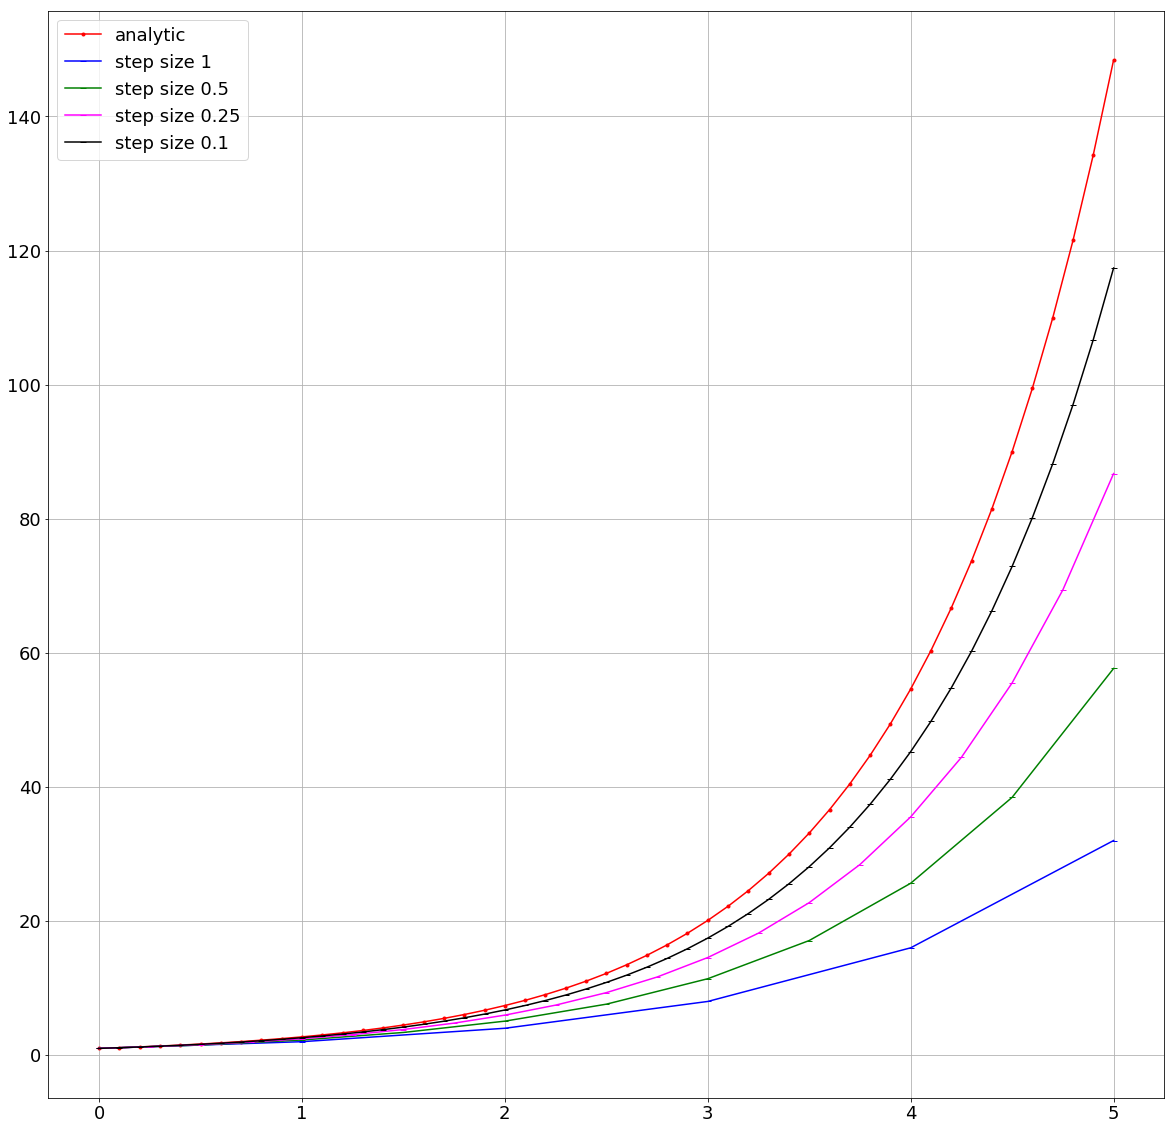

In [6]:
function_1 = lambda y,t: y
plot(ana=analytic_1, function=function_1, y0=1)

#### Example: 
We can check how well our numerical method works by checking with an example.

Let's implement this procedure for $y' = y^2$ for $0 \leq t \leq 5$ and $y(0) = -1$.<br/>

First we should solve this using analytical methods to have a base equation to test against.
$
\frac{dy}{dt} = y^2 \\
\frac{1}{y^2} dy = dt
$<br/>
Integrating on both sides on the given boundary conditions:<br/>
$
\int_{y_0}^{y(t)} \frac{1}{(y')^2}\,dy' = \int_{0}^{t} \,dt'
\\
\frac{y(t)-y_0}{y(t) y_0} = t
$
<br/>
Solving for $y(t)$ and simplifying:<br/>
$
y(t) = \frac{-y_0}{y_0 t - 1}
$
<br/>
So we know the analytic solution to our differential equation and we can now use that as a baseline to compare how well Euler's method approximates the solution where $y_0 = -1$.

In [7]:
def analytic_2(t, y0 = -1):
    '''
    The analytic solution to the ODE y' = y^2.
    
    Parameters
    ----------
    t: array
        Array of t-values to find y[t]
        
    y0: double
        Value of initial condition at t[0].
        
    Returns
    -------
    y: array
        Array of y-values of the solution y(t) = y0/(y0 t - 1)
        
    '''
    
    y=[]
    v=1
    for n in range(0, len(t)):
        func = -y0 / (y0*t[n] - 1)
        y.append(func)
        
    return y, v

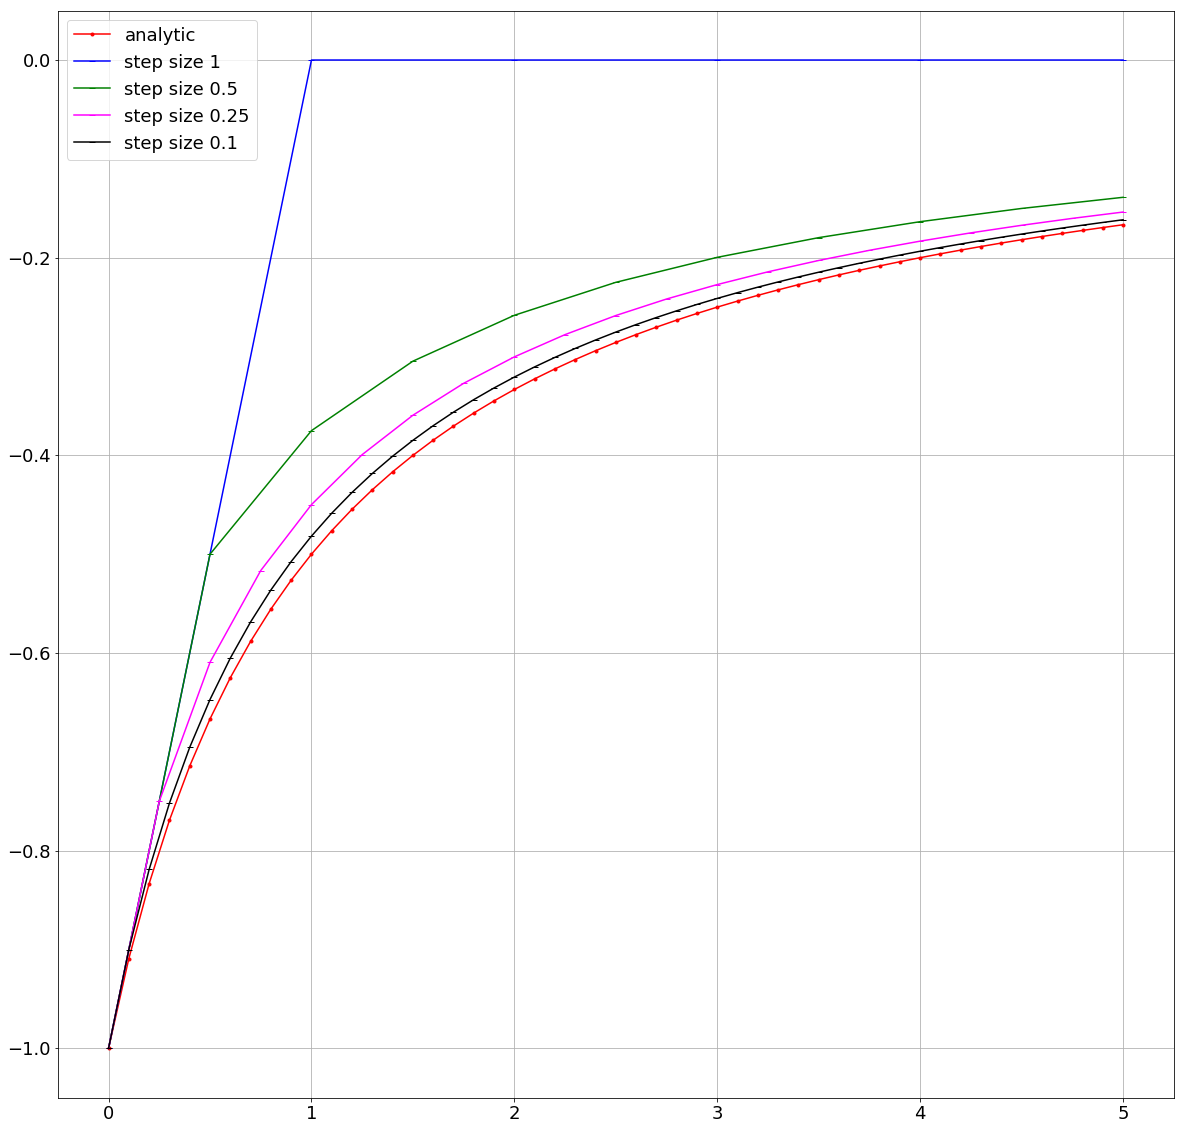

In [8]:
function_2 = lambda y,t: y**2
plot(ana=analytic_2, function=function_2, y0=-1)

#### Second order ODE and Euler's Method
We can expand the first order method for second order differential equations and possibly beyond.
<br/>
First consider the Second order differential equation of the form:
<br/><br/>
$
a_2(t) y'' + a_1(t) y' + a_0(t) y = g(t)
$
<br/><br/>
where $a_2,a_1,a_0, g$ are functions of the independent variable $t$. We can define two functions such that $y_1(t) = y$ and $y_2(t) = y'$ which allows us to rewrite the differential equation as:
<br/><br/>
$
a_2(t) y_2' + a_1(t) y_2 + a_0(t) y_1 = g(t)
$
<br/><br/>
We can freely rearrange the equation to match a first order differential equation of y_2(t):
<br/><br/>
$
y_2' = \frac{1}{a_2(t)}(g(t)-a_1(t) y_2 - a_0(t) y_1(t))
$
<br/><br/>
which matches the form required of Euler's method. However, this also depends on y_1 which is unknown at any given time. We can get around this by creating a system of differential equations which can be listed as:
<br/><br/>
$
\begin{bmatrix}
y_1'\\
y_2'
\end{bmatrix}
=
\begin{bmatrix}
y_2 \\
\frac{1}{a_2(t)}(g(t)-a_1(t) y_2 - a_0(t) y_1(t))
\end{bmatrix}
$
<br/><br/>
Now we have a system with a vector valued function f(t,y). We require two initial conditions, $y(0) = y_1(0) = c_0$ and $y'(0) = y_2(0) = c_1$, which allows us to define an initial vector y_0:
<br/><br/>
$
\begin{bmatrix}
y_1(0) \\
y_2(0)
\end{bmatrix}
=
\begin{bmatrix}
c_0 \\
c_1
\end{bmatrix}
$
<br/><br/>
We can now write a function to solve the second order ODE's based on Euler's method. 

In [9]:
def ODE_Euler_2(f, y0, t):
    '''
    Approximate the solution of y'=f(y,t) by Euler's method
    for a system of first order
    
    Parameters
    ----------
    f: function array
        RHS of ODE y'=f(y,t)
    y0: number array
        Initial condition of y(0)=y0
    t: array
        Numpy array of t values where we approximate y values. 
        Time step at each iteration is given by t[n+1] - t[n].
    
    Returns
    -------
    y1: array
        Approximation y[n] of the solution y(t_n) computed by Euler's method.
     
    '''
    
    y1=[]
    y2=[]
    
    #store initial values
    y1.append(y0[0])
    y2.append(y0[1])
    for n in range(0, len(t)-1):
        dt = t[n+1] - t[n]
        
        #solve for y1
        y1_next = y1[n] + f[0](y1[n],y2[n],t[n])*dt
        y1.append(y1_next)
        
        #solve for y2
        y2_next = y2[n] + f[1](y1[n],y2[n],t[n])*dt
        y2.append(y2_next)
        
    return y1, y2

#### Example
Lets test the new Eulers method for the differential equation defined as:
<br/><br/>
$
y''+y = 0
$
<br/><br/>
with intial conditions $y(0)=1$ and $y'(0)=0$. Analytically this can be quickly solved as a cosine function:
<br/><br/>
$
y(t) = \cos(t)
$.
<br/><br/>

For the computational method, we end up with the system:
<br/><br/>
$
\begin{bmatrix}
y_1'\\
y_2'
\end{bmatrix}
=
\begin{bmatrix}
y_2 \\
-y_1
\end{bmatrix},
\begin{bmatrix}
y_1(0) \\
y_2(0)
\end{bmatrix}
=
\begin{bmatrix}
1 \\
0
\end{bmatrix}
$
<br/><br/>.

In [10]:
def analytic_3(t, y0=1):
    '''
    The analytic solution to the ODE y'' + y = 0.
    
    Parameters
    ----------
    t: array
        Array of t-values to find y[t]
        
    y0: double
        Value of initial condition at t[0].
        
    Returns
    -------
    y: array
        Array of y-values of the solution y(t) = cos(t)
        
    '''
    
    y=[]
    v=[]
    for n in range(0, len(t)):
        func = np.cos(t[n])
        y.append(func)   
        func_v = -np.sin(t[n])
        v.append(func_v)
    return y, v

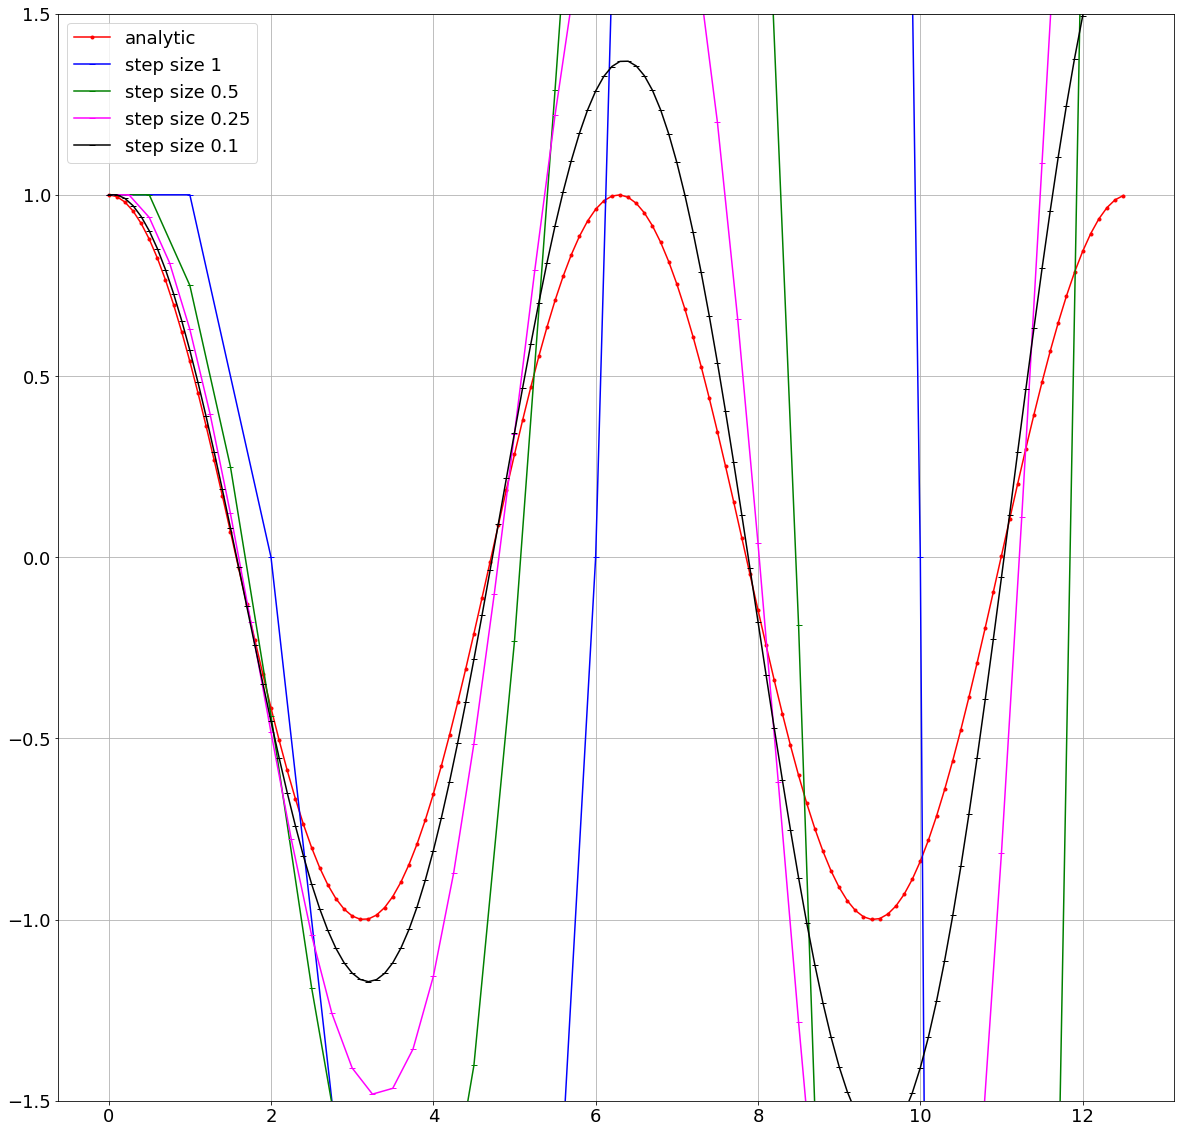

In [11]:
t_val_list = []
for i in range(0,len(t_steps)):
    t_val_list.append(np.arange(0,4*np.pi,t_steps[i]))

func = [lambda y1,y2,t:y2, lambda y1,y2,t: -y1]
plot(ana=analytic_3, function=func, y0=[1,0],
     Euler_version=ODE_Euler_2, y_limit=[-1.5,1.5])

As we can see the error increases in this oscillating system as t grow larger. So although we can solve second order equations using Euler's method, it only works well for small time t in oscillating situations. We will need to look at other computational methods for solving more complex systems.

## Leapfrog Method
The leapfrog method is used to solve differential equations of the form:
<br/><br/>
$
y''=A(y)
$
<br/><br/>
or equivalently of the form:
<br/><br/>
$
v'=A(y), y' = v
$
<br/><br/>
Leapfrog method is equivalent to updating the positions $y(t)$ and velocities $v(t)$ at interweaved time points, staggered in such a way that they "leapfrog" over each other.

Leapfrog method is a second-order method as compared to the Euler method of first order. Unlike the Euler method, Leapfrog is stable for oscillatory motion, as long as the time-step $\delta t$ is constant and $\delta t \leq 2/\omega$. 

Like our modified Euler equation, it is useful to rewrite our second order differential equation in the form of a system of first order equations:
<br/><br/>
$
\begin{bmatrix}
y'(t)\\
v'(t)
\end{bmatrix}
=
\begin{bmatrix}
v(t)\\
A(y(t))
\end{bmatrix}
$
<br/><br/>
We can write these derivatives in a mathematically exact (in the limit $\Delta t \rightarrow 0$) form described by:
<br/><br/>
$    
\frac{y_{n+1}-y_{n}}{\Delta t} = v_{n+\frac{1}{2}} \\
\frac{v_{n+\frac{1}{2}}-v_{n-\frac{1}{2}}}{\Delta t} = A(y_n)
$
<br/><br/>
where $\Delta t$ is our time step. We can rearrange these equations to find a relation allowing us to find each next point of the solution:
<br/><br/>
$
y_{n+1}=y_{n}+v_{n+\frac{1}{2}} \Delta t
\\
v_{n+\frac{1}{2}} = v_{n-\frac{1}{2}} + A(y_n) \Delta t
$.
<br/><br/>
We need turn this into a more useful form where the position and velocities steps are synchronised. This is important to be able to create phase-space plots and determine the starting point of velocity given that the we know $v_0$ the initial velocity. We can write the half-stepped velocity $v_{n+\frac{1}{2}}$ in terms of a synchronized full step $v_n$ as:
<br/><br/>
$
v_{n+\frac{1}{2}} = v_{n} + \frac{1}{2} A(y_n) \Delta t
$
<br/><br/>
where we are taking a half step from $v_n$ in $\Delta t$.

We should also define in a similar way the conversion from half-step to whole step of v_{n+1}:
<br/><br/>
$
v_{n+1} = v_{n+\frac{1}{2}} + \frac{1}{2} A(y_{n+1}) \Delta t
$.
<br/><br/>

We can now find the next velocity and position in terms velocity and position in the synchronized system:
<br/><br/>
$
v_{n+1} = v_{n} + \frac{1}{2} \Delta t (A(y_n)+A(y_{n+1}))
\\
y_{n+1} = y_n + v_n \Delta t + \frac{1}{2} A(y_n) \Delta t ^2
$.

This gives enough information now to create a function call for the LeapFrog method.

In [12]:
def Leapfrog(f, y0, t):
    '''
    Approximate the solution of y'' = f(y,t) by Leapfrog method
    
    Parameters
    ----------
    f: function array
        RHS of ODE y'' = f(y,t)
    y0: number array
        Initial condition of y(0) = y0, v(0) = v0
    t: array
        Numpy array of t values where we approximate y values. 
        Time step at each iteration is given by t[n+1] - t[n].
    
    Returns
    -------
    y: array
        Approximation y[n] of the solution y(t_n) computed by Euler's method.
     
    '''
    
    y=[]
    v=[]
    
    #store initial values
    y.append(y0[0])
    v.append(y0[1])
    for n in range(0, len(t)-1):
        dt = t[n+1] - t[n]
        
        #solve for y1
        y_next = y[n] + v[n]*dt + 0.5*f(y[n],t)*(dt**2)
        y.append(y_next)
        
        #solve for y2
        v_next = v[n] + 0.5*(f(y[n+1],t) + f(y[n],t))*dt
        v.append(v_next)
        
    return y,v

#### Example:
Lets take a look back at the differential equation of the last example but this time we will evaluate numerically using the Leapfrog method.
<br/><br/>
$
y''+y = 0
$
<br/><br/>
with intial conditions $y(0)=1$ and $y'(0)=0$. Analytically this can be quickly solved as a cosine function:
<br/><br/>
$
y(t) = \cos(t)
$.
<br/><br/>

In order to use this in the leapfrog method, we should write in the form $y''=A(y)$ and find our equation for $A(y)$.
<br/><br/>
$
y''=-y
\\ \\
$
so the equation $A(y)$ is $A(y) = -y$. We can now evaluate our leapfrog method.

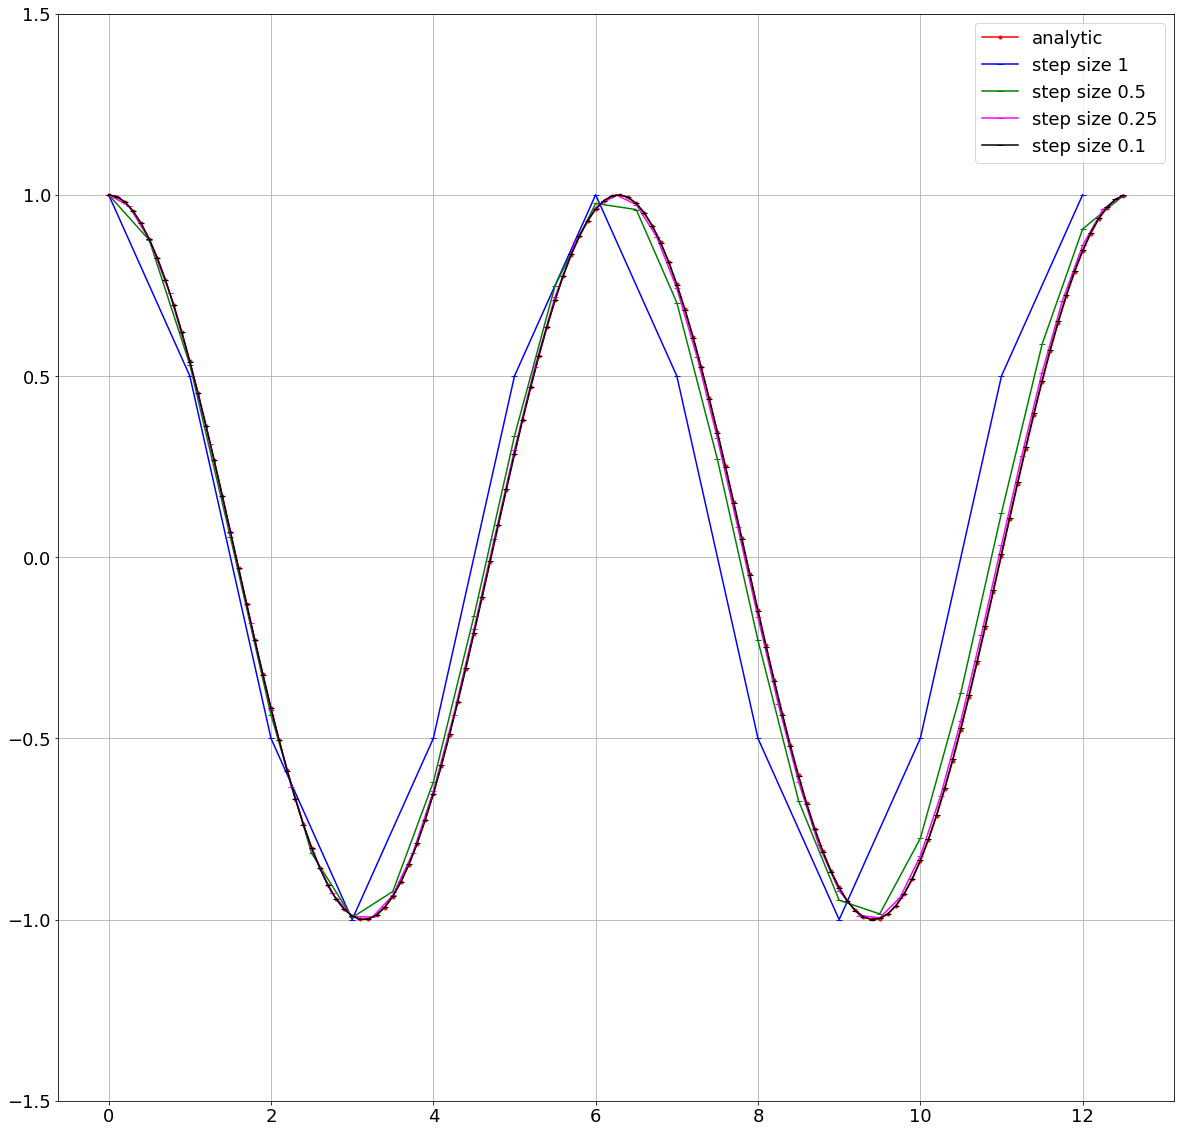

In [13]:
A = lambda y,t: -y

t_val_list = []
for i in range(0,len(t_steps)):
    t_val_list.append(np.arange(0,4*np.pi,t_steps[i]))

plot(ana=analytic_3, function=A, y0=[1,0],
     Euler_version=Leapfrog, y_limit=[-1.5,1.5])

As we can see, the Leapfrog method performs significantly better than our previous modified Euler method for the same time step sizes.

In [14]:
def plot_comp(ana, function, y0, ODE=ODE_Euler, y_limit='none'):
    '''
    Creates plots overlaying analytic solution with Euler method
    with different step sizes
    
    Parameters
    ----------
    ana: function
        analytic solution to desired ODE
    
    f: function
        RHS of the differential equation y'=f(y,t)
    
    y0: double
        initial condition for the differential equation
        
    '''
    
    color=['red', 'blue', 'green']
    t_val=np.arange(0,4*np.pi,.3)

    #initialize figure
    mpl.rcParams.update({'font.size':18})
    fig = plt.figure(figsize=(20,20))

    ax = fig.add_subplot(111)
    
    for i in range(0,len(ODE)+1):
        #print(i) 
        if i==0:
            y_vals, v = ana(t_val)
            ax.plot(t_val, y_vals,
                    label='analytic', marker='.', color='C'+str(i))
        else:
            #print(str(ODE[i-1]))
            y_vals, v = ODE[i-1](f=function[i-1], y0=y0, t=t_val)
            ax.plot(t_val, y_vals,
                    label=str(ODE[i-1]),
                    linestyle = 'dotted',
                    marker='_', color='C'+str(2*i-1))
        
    if y_limit != 'none':
        ax.set_ylim(y_limit[0],y_limit[1])
        
    plt.grid(True)
    plt.legend();

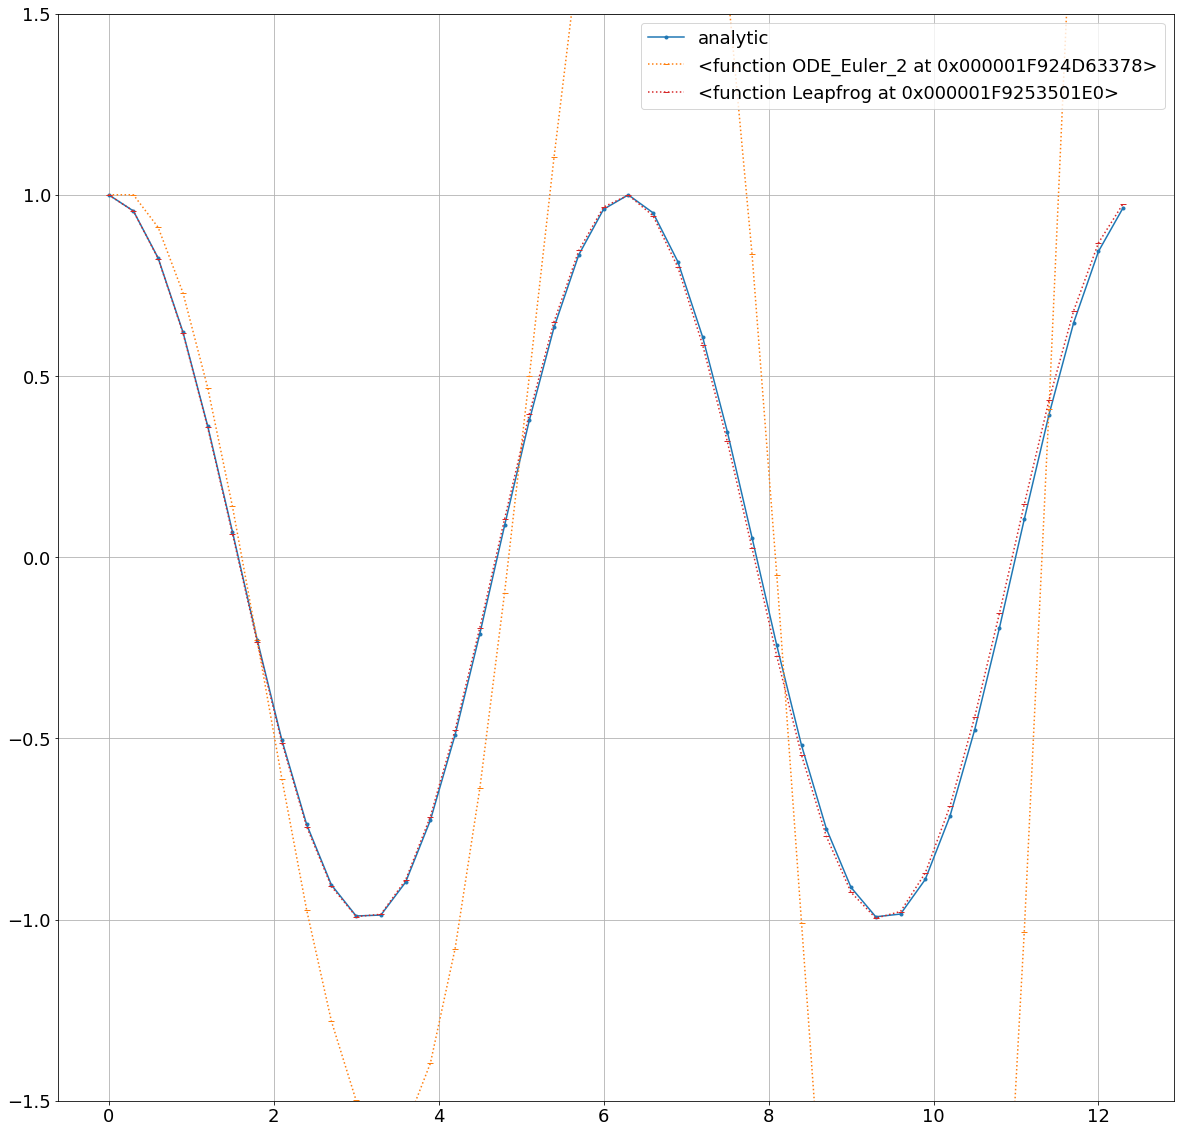

In [15]:
plot_comp(ana=analytic_3, function=[[lambda y1,y2,t:y2, lambda y1,y2,t: -y1], lambda y,t: -y],
          y0=[1,0], ODE=[ODE_Euler_2, Leapfrog], y_limit=[-1.5,1.5])

#### Energy conservation
Certain methods perform better under different conditions such as maintaining energy conservation. The next set of plots looks at the change in energy of a function time between our two different methods and different step sizes.



In [16]:
def energy_shift(method, f, ana, y0, t_vals):
    
    y_ana, v_ana = ana(t_vals)
    #print (v_ana, y_ana)
    
    E_list=[]
    for i in range(0,len(method)):
        #print(method[i])
        y_val, v_val = method[i](f=f[i], y0=y0, t=t_vals)
        E_vals = []
        for j in range(0,len(v_val)):
            #print(len(v_val),len(v_ana))
            E_vals.append(1/2*(v_val[j]**2 - v_ana[j]**2))
        E_list.append(E_vals)
    return E_list

51


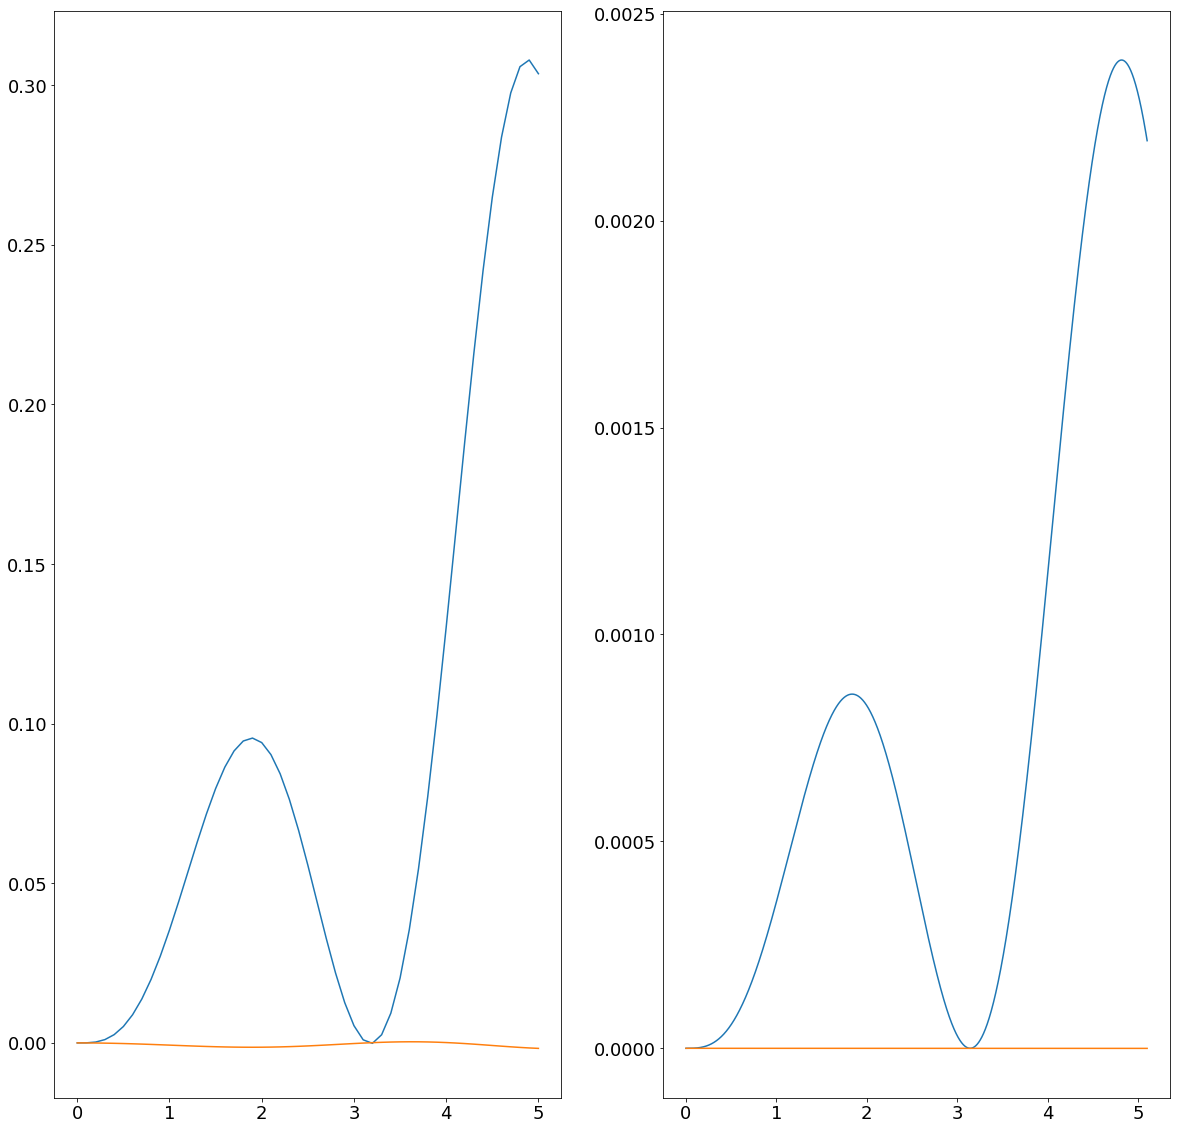

In [17]:
t_steps = [.1, 0.001]
t_val_list = []
for i in range(0,len(t_steps)):
    t_val_list.append(np.arange(0,5.1,t_steps[i]))

f = [[lambda y1,y2,t:y2, lambda y1,y2,t: -y1], lambda y,t: -y]
methods = [ODE_Euler_2, Leapfrog]
E_step=[]
for i in range(0,len(t_val_list)):
    E = energy_shift(method=methods, f=f, 
                     ana=analytic_3, y0=[1,0], t_vals=t_val_list[i])
    E_step.append(E)
    
#initialize figure
mpl.rcParams.update({'font.size':18})
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(121)
ax2= fig.add_subplot(122)

print(len(E_step[0][0]))
ax.plot(t_val_list[0],E_step[0][0])
ax.plot(t_val_list[0],E_step[0][1])

ax2.plot(t_val_list[1],E_step[1][0])
ax2.plot(t_val_list[1],E_step[1][1]);

## Runge-Kutta Method
Given Differential equation on the usual form:
$
y'(t) = f(y,t)
$

In stead of solving the integral for a later time $t+h$, it is easier to approximate using a quadrature of the form:
$
y(t+h)\approx x(t) + h \sum_{i=1}^{N}\omega_i f(t+\nu_i h, y(t+\nu_i h))
$

The accuracy of the quadrature depends on the number of terms in the summation, the weights, $\omega_i$, and the positions of the nodes, $\nu_i$.

Let us define $\nu_1 = 0$ such that:
$
K_1 = h f(t,y)
$

We can then use K1 since we know its value at the intial conditions to approximate to higher order terms.  

$
K_2 = h f(t+\alpha_2 h, y + \beta_{21}K_1)
$

A condition implied by Runge-Kutta is:
$
\alpha_i = \sum_{j=1}^{i-1} \beta_{ij}
$

We need to choose the $\alpha_i, \beta_{ij}$ and $\omega_i$ by using taylor series expansions of the $K_i$ and $f(y,t)$.
<br/><br/>
$
y(t+h) = y + h y' + \frac{h^2}{2} y''
\\
= y + \omega_1 K_1 + \omega_2 K_2
\\
\\
h y' + \frac{h^2}{2} y'' =\omega_1 K_1 + \omega_2 K_2
\\
$

So first lets evaluate the derivatives $y^{(n)}$ with respect to $t$

$
y'=f(y,t)
\\
y''=f_t + f f_y
$

Now we can take the Taylor expansions of multiple variables on the $K_i$'s

$
K_1 = h f 
\\
K_2 = h f + f_t \alpha_2 h^2 + \beta h^2 f f_x 
$

Now we can relate back to our relationship between the taylor expansion of y and the quadrature to begin getting relationships between constants.<br/>
$
\\
\omega_1 K_1 + \omega_2 K_2 = h f + \frac{h^2}{2}(f_t + f f_y)
\\
\omega_1 h f + \omega_2 (hf + f_t \alpha_2 h^2 + \beta h^2 f f_y) = h f + \frac{h^2}{2}(f_t + f f_y)
$

Matching like terms to get the relationships between the constants.

$
1 = \omega_1 + \omega_2
\\
\frac{1}{2} = \omega_2 \alpha_2
\\
\frac{1}{2} = \beta_{21} \omega_2
$

The typical choice for the second-order Runge-Kutta (RK2) methods is $\alpha_2 = \beta_{21} = \frac{1}{2}$ and $\omega_1 = \omega_2 = \frac{1}{2}$. This choice satisfies all the conditions on the constants and leaves us with the relation on the next y-terms of:
<br/>
$
y_{n+1} = y_n + K_1 + K_2
\\
$
with the $K_i$'s: <br/>
$
K_1 = h f(y_n, t)
\\
K_2 = h f(y_{n}+\frac{1}{2} h f(y_n, t), t + \frac{1}{2}h) 
$


In [18]:
def RK2(f, y0, t):
    '''
    Approximate the solution of y' = f(y,t) by RK2 method
    
    Parameters
    ----------
    f: function array
        RHS of ODE y' = f(y,t)
    y0: number array
        Initial condition of y(0) = y0, v(0) = v0
    t: array
        Numpy array of t values where we approximate y values. 
        Time step at each iteration is given by t[n+1] - t[n].
    
    Returns
    -------
    y: array
        Approximation y[n] of the solution y(t_n) computed by Euler's method.
     
    '''
    
    y=[]
    v=1
    
    #store initial values
    y.append(y0[0])
    
    for n in range(0, len(t)-1):
        h = t[n+1] - t[n]
        
        #solve k's
        K1 = h * f(y[n],t[n])
        K2 = h * f(y[n] + 1/2 * K1, t[n] + h/2)
        
        y_next = y[n] + K1 + K2
        
        y.append(y_next)
        
    return y,v

In [19]:
def RK4(f, y0, t):
    '''
    Approximate the solution of y' = f(y,t) by RK4 method
    
    Parameters
    ----------
    f: function array
        RHS of ODE y' = f(y,t)
    y0: number array
        Initial condition of y(0) = y0, v(0) = v0
    t: array
        Numpy array of t values where we approximate y values. 
        Time step at each iteration is given by t[n+1] - t[n].
    
    Returns
    -------
    y: array
        Approximation y[n] of the solution y(t_n) computed by Euler's method.
     
    '''
    
    y=[]
    v=1
    
    #store initial values
    y.append(y0[0])
    
    for n in range(0, len(t)-1):
        h = t[n+1] - t[n]
        
        #solve k's
        K1 = h * f(y[n],t[n])
        K2 = h * f(y[n] + 1/2 * K1, t[n] + h/2)
        K3 = h * f(y[n] + 1/2 * K2, t[n] + h/2)
        K4 = h * f(y[n] + K3, t[n] + h)
        
        y_next = y[n] + 1/6 * (K1 + 2*K2 + 2*K3 + K4)
        
        y.append(y_next)
        
    return y,v

In [20]:
from python_classes.lagrange import two_body, Lagrange_finder
from python_classes.variables import *
#from sympy import *

In [21]:
display(Math(latex(T)))
display(Math(latex(U)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [23]:
# Use dynamic symbols first
#q = [xt_1, yt_1, xt_2, yt_2]
#q_dot = [xt_1_dot, yt_1_dot, xt_2_dot, yt_2_dot]

# These will be substituted in after solving lagranges equations.
#p = [x_1, y_1, x_2, y_2]
#p_dot = [x_1_dot, y_1_dot, x_2_dot, y_2_dot]
#p_ddot = [x_1_ddot,  y_1_ddot, x_2_ddot, y_2_ddot]

#constants
m_1 = 20.
m_2 = 20.
G = 20.

orbit = two_body(q = q, q_dot = q_dot,
                 p = p, p_dot = p_dot, p_ddot = p_ddot,
                 G = G, m_1 = m_1, m_2 = m_2)

lagrangian = orbit.Lagrangian(U = U, T = T, debug=True)
display(Math(latex(lagrangian)))

diffeq = orbit.Lagrange()

display(Math(latex(diffeq)))

orbit.conversion();

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Revision notes:
11/11/2020: 
* initialize program
* function call for ODE_Euler added
* added function plot
* created first two examples using Eulers method
* added notes about Eulers method

11/12/2020:
* created function based on Eulers method to solve second order diff eq
* created second order example based on new Eulers method
* added notes for Leapfrog method
* created Leapfrog function call
* updated plot to read in desired differential method
* ran second example with leapfrog method
* add change in energy plots

11/13/2020
* Created Runge-Kutta section
* Proof of RK2 method
* RK2 function written
* RK4 function written

12/08/2020
* Created file python_classes/lagrange with classes:
 * Lagrange_finder
 * two_body
* Implemented use of classes for two body